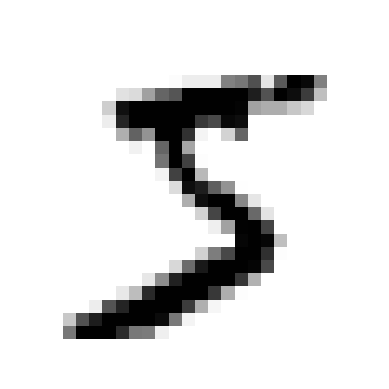

In [1]:
# Ch 3: Classification — Step-by-Step in Python

# Load and visualize MNIST data

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(int)

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


In [9]:
# Train a binary classifier - is it a 5?

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

y_binary = (y == 5)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train)
print("Prediction:", clf.predict([some_digit]))  # True if 5

y [5 0 4 ... 4 5 6]
Prediction: [False]


In [10]:
# Performance evaluation

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
print("Cross-validated Accuracy:", accuracy.mean())


Cross-validated Accuracy: 0.9669105953211604


In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
print(conf_matrix)

[[50287   673]
 [ 1180  3860]]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

Precision: 0.8515332009706597
Recall: 0.7658730158730159
F1 Score: 0.8064347644416588
